# Import library

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split, cross_val_score

pd.options.display.max_columns = 100
pd.options.display.max_rows = 3000

# Loading data

In [2]:
df = pd.read_csv('../project_2/datasets/train.csv')
df_test = pd.read_csv('../project_2/datasets/test.csv')

In [3]:
df.head(2)

,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,Condition 2,Bldg Type,House Style,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Roof Style,Roof Matl,Exterior 1st,Exterior 2nd,Mas Vnr Type,Mas Vnr Area,Exter Qual,Exter Cond,Foundation,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Heating,Heating QC,Central Air,Electrical,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,Kitchen Qual,TotRms AbvGrd,Functional,Fireplaces,Fireplace Qu,Garage Type,Garage Yr Blt,Garage Finish,Garage Cars,Garage Area,Garage Qual,Garage Cond,Paved Drive,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,SalePrice
0,109,533352170,60,RL,NaN,13517,Pave,NaN,IR1,Lvl,AllPub,CulDSac,Gtl,Sawyer,RRAe,Norm,1Fam,2Story,6,8,1976,2005,Gable,CompShg,HdBoard,Plywood,BrkFace,289.0,Gd,TA,CBlock,TA,TA,No,GLQ,533.0,Unf,0.0,192.0,725.0,GasA,Ex,Y,SBrkr,725,754,0,1479,0.0,0.0,2,1,3,1,Gd,6,Typ,0,NaN,Attchd,1976.0,RFn,2.0,475.0,TA,TA,Y,0,44,0,0,0,0,NaN,NaN,NaN,0,3,2010,WD,130500
1,544,531379050,60,RL,43.0,11492,Pave,NaN,IR1,Lvl,AllPub,CulDSac,Gtl,SawyerW,Norm,Norm,1Fam,2Story,7,5,1996,1997,Gable,CompShg,VinylSd,VinylSd,BrkFace,132.0,Gd,TA,PConc,Gd,TA,No,GLQ,637.0,Unf,0.0,276.0,913.0,GasA,Ex,Y,SBrkr,913,1209,0,2122,1.0,0.0,2,1,4,1,Gd,8,Typ,1,TA,Attchd,1997.0,RFn,2.0,559.0,TA,TA,Y,0,74,0,0,0,0,NaN,NaN,NaN,0,4,2009,WD,220000


# lower case and snake_case column names

In [4]:
# Process column names against train data

df.columns = df.columns.str.lower().str.replace(' ', '_')

In [5]:
df.head(2)

,id,pid,ms_subclass,ms_zoning,lot_frontage,lot_area,street,alley,lot_shape,land_contour,utilities,lot_config,land_slope,neighborhood,condition_1,condition_2,bldg_type,house_style,overall_qual,overall_cond,year_built,year_remod/add,roof_style,roof_matl,exterior_1st,exterior_2nd,mas_vnr_type,mas_vnr_area,exter_qual,exter_cond,foundation,bsmt_qual,bsmt_cond,bsmt_exposure,bsmtfin_type_1,bsmtfin_sf_1,bsmtfin_type_2,bsmtfin_sf_2,bsmt_unf_sf,total_bsmt_sf,heating,heating_qc,central_air,electrical,1st_flr_sf,2nd_flr_sf,low_qual_fin_sf,gr_liv_area,bsmt_full_bath,bsmt_half_bath,full_bath,half_bath,bedroom_abvgr,kitchen_abvgr,kitchen_qual,totrms_abvgrd,functional,fireplaces,fireplace_qu,garage_type,garage_yr_blt,garage_finish,garage_cars,garage_area,garage_qual,garage_cond,paved_drive,wood_deck_sf,open_porch_sf,enclosed_porch,3ssn_porch,screen_porch,pool_area,pool_qc,fence,misc_feature,misc_val,mo_sold,yr_sold,sale_type,saleprice
0,109,533352170,60,RL,NaN,13517,Pave,NaN,IR1,Lvl,AllPub,CulDSac,Gtl,Sawyer,RRAe,Norm,1Fam,2Story,6,8,1976,2005,Gable,CompShg,HdBoard,Plywood,BrkFace,289.0,Gd,TA,CBlock,TA,TA,No,GLQ,533.0,Unf,0.0,192.0,725.0,GasA,Ex,Y,SBrkr,725,754,0,1479,0.0,0.0,2,1,3,1,Gd,6,Typ,0,NaN,Attchd,1976.0,RFn,2.0,475.0,TA,TA,Y,0,44,0,0,0,0,NaN,NaN,NaN,0,3,2010,WD,130500
1,544,531379050,60,RL,43.0,11492,Pave,NaN,IR1,Lvl,AllPub,CulDSac,Gtl,SawyerW,Norm,Norm,1Fam,2Story,7,5,1996,1997,Gable,CompShg,VinylSd,VinylSd,BrkFace,132.0,Gd,TA,PConc,Gd,TA,No,GLQ,637.0,Unf,0.0,276.0,913.0,GasA,Ex,Y,SBrkr,913,1209,0,2122,1.0,0.0,2,1,4,1,Gd,8,Typ,1,TA,Attchd,1997.0,RFn,2.0,559.0,TA,TA,Y,0,74,0,0,0,0,NaN,NaN,NaN,0,4,2009,WD,220000


In [7]:
df_test.head(2)

,id,pid,ms_subclass,ms_zoning,lot_frontage,lot_area,street,alley,lot_shape,land_contour,utilities,lot_config,land_slope,neighborhood,condition_1,condition_2,bldg_type,house_style,overall_qual,overall_cond,year_built,year_remod/add,roof_style,roof_matl,exterior_1st,exterior_2nd,mas_vnr_type,mas_vnr_area,exter_qual,exter_cond,foundation,bsmt_qual,bsmt_cond,bsmt_exposure,bsmtfin_type_1,bsmtfin_sf_1,bsmtfin_type_2,bsmtfin_sf_2,bsmt_unf_sf,total_bsmt_sf,heating,heating_qc,central_air,electrical,1st_flr_sf,2nd_flr_sf,low_qual_fin_sf,gr_liv_area,bsmt_full_bath,bsmt_half_bath,full_bath,half_bath,bedroom_abvgr,kitchen_abvgr,kitchen_qual,totrms_abvgrd,functional,fireplaces,fireplace_qu,garage_type,garage_yr_blt,garage_finish,garage_cars,garage_area,garage_qual,garage_cond,paved_drive,wood_deck_sf,open_porch_sf,enclosed_porch,3ssn_porch,screen_porch,pool_area,pool_qc,fence,misc_feature,misc_val,mo_sold,yr_sold,sale_type
0,2658,902301120,190,RM,69.0,9142,Pave,Grvl,Reg,Lvl,AllPub,Inside,Gtl,OldTown,Norm,Norm,2fmCon,2Story,6,8,1910,1950,Gable,CompShg,AsbShng,AsbShng,None,0.0,TA,Fa,Stone,Fa,TA,No,Unf,0,Unf,0,1020,1020,GasA,Gd,N,FuseP,908,1020,0,1928,0,0,2,0,4,2,Fa,9,Typ,0,NaN,Detchd,1910.0,Unf,1,440,Po,Po,Y,0,60,112,0,0,0,NaN,NaN,NaN,0,4,2006,WD
1,2718,905108090,90,RL,NaN,9662,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Sawyer,Norm,Norm,Duplex,1Story,5,4,1977,1977,Gable,CompShg,Plywood,Plywood,None,0.0,TA,TA,CBlock,Gd,TA,No,Unf,0,Unf,0,1967,1967,GasA,TA,Y,SBrkr,1967,0,0,1967,0,0,2,0,6,2,TA,10,Typ,0,NaN,Attchd,1977.0,Fin,2,580,TA,TA,Y,170,0,0,0,0,0,NaN,NaN,NaN,0,8,2006,WD


No need to reindex here
- df = df.reindex(sorted(df.columns), axis=1)

# Handle null values

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2051 entries, 0 to 2050
Data columns (total 81 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               2051 non-null   int64  
 1   pid              2051 non-null   int64  
 2   ms_subclass      2051 non-null   int64  
 3   ms_zoning        2051 non-null   object 
 4   lot_frontage     1721 non-null   float64
 5   lot_area         2051 non-null   int64  
 6   street           2051 non-null   object 
 7   alley            140 non-null    object 
 8   lot_shape        2051 non-null   object 
 9   land_contour     2051 non-null   object 
 10  utilities        2051 non-null   object 
 11  lot_config       2051 non-null   object 
 12  land_slope       2051 non-null   object 
 13  neighborhood     2051 non-null   object 
 14  condition_1      2051 non-null   object 
 15  condition_2      2051 non-null   object 
 16  bldg_type        2051 non-null   object 
 17  house_style   

In [9]:
df.columns

Index(['id', 'pid', 'ms_subclass', 'ms_zoning', 'lot_frontage', 'lot_area',
       'street', 'alley', 'lot_shape', 'land_contour', 'utilities',
       'lot_config', 'land_slope', 'neighborhood', 'condition_1',
       'condition_2', 'bldg_type', 'house_style', 'overall_qual',
       'overall_cond', 'year_built', 'year_remod/add', 'roof_style',
       'roof_matl', 'exterior_1st', 'exterior_2nd', 'mas_vnr_type',
       'mas_vnr_area', 'exter_qual', 'exter_cond', 'foundation', 'bsmt_qual',
       'bsmt_cond', 'bsmt_exposure', 'bsmtfin_type_1', 'bsmtfin_sf_1',
       'bsmtfin_type_2', 'bsmtfin_sf_2', 'bsmt_unf_sf', 'total_bsmt_sf',
       'heating', 'heating_qc', 'central_air', 'electrical', '1st_flr_sf',
       '2nd_flr_sf', 'low_qual_fin_sf', 'gr_liv_area', 'bsmt_full_bath',
       'bsmt_half_bath', 'full_bath', 'half_bath', 'bedroom_abvgr',
       'kitchen_abvgr', 'kitchen_qual', 'totrms_abvgrd', 'functional',
       'fireplaces', 'fireplace_qu', 'garage_type', 'garage_yr_blt',
       'g

In [10]:
df.head()

,id,pid,ms_subclass,ms_zoning,lot_frontage,lot_area,street,alley,lot_shape,land_contour,utilities,lot_config,land_slope,neighborhood,condition_1,condition_2,bldg_type,house_style,overall_qual,overall_cond,year_built,year_remod/add,roof_style,roof_matl,exterior_1st,exterior_2nd,mas_vnr_type,mas_vnr_area,exter_qual,exter_cond,foundation,bsmt_qual,bsmt_cond,bsmt_exposure,bsmtfin_type_1,bsmtfin_sf_1,bsmtfin_type_2,bsmtfin_sf_2,bsmt_unf_sf,total_bsmt_sf,heating,heating_qc,central_air,electrical,1st_flr_sf,2nd_flr_sf,low_qual_fin_sf,gr_liv_area,bsmt_full_bath,bsmt_half_bath,full_bath,half_bath,bedroom_abvgr,kitchen_abvgr,kitchen_qual,totrms_abvgrd,functional,fireplaces,fireplace_qu,garage_type,garage_yr_blt,garage_finish,garage_cars,garage_area,garage_qual,garage_cond,paved_drive,wood_deck_sf,open_porch_sf,enclosed_porch,3ssn_porch,screen_porch,pool_area,pool_qc,fence,misc_feature,misc_val,mo_sold,yr_sold,sale_type,saleprice
0,109,533352170,60,RL,NaN,13517,Pave,NaN,IR1,Lvl,AllPub,CulDSac,Gtl,Sawyer,RRAe,Norm,1Fam,2Story,6,8,1976,2005,Gable,CompShg,HdBoard,Plywood,BrkFace,289.0,Gd,TA,CBlock,TA,TA,No,GLQ,533.0,Unf,0.0,192.0,725.0,GasA,Ex,Y,SBrkr,725,754,0,1479,0.0,0.0,2,1,3,1,Gd,6,Typ,0,NaN,Attchd,1976.0,RFn,2.0,475.0,TA,TA,Y,0,44,0,0,0,0,NaN,NaN,NaN,0,3,2010,WD,130500
1,544,531379050,60,RL,43.0,11492,Pave,NaN,IR1,Lvl,AllPub,CulDSac,Gtl,SawyerW,Norm,Norm,1Fam,2Story,7,5,1996,1997,Gable,CompShg,VinylSd,VinylSd,BrkFace,132.0,Gd,TA,PConc,Gd,TA,No,GLQ,637.0,Unf,0.0,276.0,913.0,GasA,Ex,Y,SBrkr,913,1209,0,2122,1.0,0.0,2,1,4,1,Gd,8,Typ,1,TA,Attchd,1997.0,RFn,2.0,559.0,TA,TA,Y,0,74,0,0,0,0,NaN,NaN,NaN,0,4,2009,WD,220000
2,153,535304180,20,RL,68.0,7922,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,5,7,1953,2007,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,Gd,CBlock,TA,TA,No,GLQ,731.0,Unf,0.0,326.0,1057.0,GasA,TA,Y,SBrkr,1057,0,0,1057,1.0,0.0,1,0,3,1,Gd,5,Typ,0,NaN,Detchd,1953.0,Unf,1.0,246.0,TA,TA,Y,0,52,0,0,0,0,NaN,NaN,NaN,0,1,2010,WD,109000
3,318,916386060,60,RL,73.0,9802,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Timber,Norm,Norm,1Fam,2Story,5,5,2006,2007,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,Unf,0.0,Unf,0.0,384.0,384.0,GasA,Gd,Y,SBrkr,744,700,0,1444,0.0,0.0,2,1,3,1,TA,7,Typ,0,NaN,BuiltIn,2007.0,Fin,2.0,400.0,TA,TA,Y,100,0,0,0,0,0,NaN,NaN,NaN,0,4,2010,WD,174000
4,255,906425045,50,RL,82.0,14235,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,SawyerW,Norm,Norm,1Fam,1.5Fin,6,8,1900,1993,Gable,CompShg,Wd Sdng,Plywood,None,0.0,TA,TA,PConc,Fa,Gd,No,Unf,0.0,Unf,0.0,676.0,676.0,GasA,TA,Y,SBrkr,831,614,0,1445,0.0,0.0,2,0,3,1,TA,6,Typ,0,NaN,Detchd,1957.0,Unf,2.0,484.0,TA,TA,N,0,59,0,0,0,0,NaN,NaN,NaN,0,3,2010,WD,138500


In [22]:
# Create a filter num_col to quickly see columns I care about for now

num_col = ['1st_flr_sf', '2nd_flr_sf', 'bsmtfin_sf_1',
           'bsmt_unf_sf', 'garage_area', 'gr_liv_area', 'lot_area',
           'neighborhood', 'open_porch_sf', 'overall_cond', 'overall_qual',
           'total_bsmt_sf', 'totrms_abvgrd', 'year_built']

# Clean-up and EDA

In [12]:
# handle df_sub2 .isnull()
df[num_col].isnull().sum()

saleprice        0
1st_flr_sf       0
2nd_flr_sf       0
bsmtfin_sf_1     1
bsmt_unf_sf      1
garage_area      1
gr_liv_area      0
lot_area         0
neighborhood     0
open_porch_sf    0
overall_cond     0
overall_qual     0
total_bsmt_sf    1
totrms_abvgrd    0
year_built       0
dtype: int64

In [13]:
# Check garage_area isnull
    
df[df['garage_area'].isnull()]

,id,pid,ms_subclass,ms_zoning,lot_frontage,lot_area,street,alley,lot_shape,land_contour,utilities,lot_config,land_slope,neighborhood,condition_1,condition_2,bldg_type,house_style,overall_qual,overall_cond,year_built,year_remod/add,roof_style,roof_matl,exterior_1st,exterior_2nd,mas_vnr_type,mas_vnr_area,exter_qual,exter_cond,foundation,bsmt_qual,bsmt_cond,bsmt_exposure,bsmtfin_type_1,bsmtfin_sf_1,bsmtfin_type_2,bsmtfin_sf_2,bsmt_unf_sf,total_bsmt_sf,heating,heating_qc,central_air,electrical,1st_flr_sf,2nd_flr_sf,low_qual_fin_sf,gr_liv_area,bsmt_full_bath,bsmt_half_bath,full_bath,half_bath,bedroom_abvgr,kitchen_abvgr,kitchen_qual,totrms_abvgrd,functional,fireplaces,fireplace_qu,garage_type,garage_yr_blt,garage_finish,garage_cars,garage_area,garage_qual,garage_cond,paved_drive,wood_deck_sf,open_porch_sf,enclosed_porch,3ssn_porch,screen_porch,pool_area,pool_qc,fence,misc_feature,misc_val,mo_sold,yr_sold,sale_type,saleprice
1712,2237,910201180,70,RM,50.0,9060,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,IDOTRR,Norm,Norm,1Fam,2Story,5,6,1923,1999,Gable,CompShg,Wd Sdng,Plywood,None,0.0,TA,TA,BrkTil,Gd,TA,No,ALQ,548.0,Unf,0.0,311.0,859.0,GasA,Ex,Y,SBrkr,942,886,0,1828,0.0,0.0,2,0,3,1,Gd,6,Typ,0,NaN,Detchd,NaN,NaN,NaN,NaN,NaN,NaN,Y,174,0,212,0,0,0,NaN,MnPrv,NaN,0,3,2007,WD,150909


In [14]:
# Make the actual change in the df
df.loc[1712,'garage_area'] = 0

In [15]:
# Varify garage_area nan is replaced by 0

df[num_col].loc[1712]

saleprice        150909
1st_flr_sf          942
2nd_flr_sf          886
bsmtfin_sf_1        548
bsmt_unf_sf         311
garage_area           0
gr_liv_area        1828
lot_area           9060
neighborhood     IDOTRR
open_porch_sf         0
overall_cond          6
overall_qual          5
total_bsmt_sf       859
totrms_abvgrd         6
year_built         1923
Name: 1712, dtype: object

In [16]:
# check bsmtfin_sf_1 .isnull()

df[df['bsmtfin_sf_1'].isnull()]
    ## bsmtfin_sf_1, bsmt_unf_sf, total_bsmt_sf == all missing
    ## Going to drop this row

,id,pid,ms_subclass,ms_zoning,lot_frontage,lot_area,street,alley,lot_shape,land_contour,utilities,lot_config,land_slope,neighborhood,condition_1,condition_2,bldg_type,house_style,overall_qual,overall_cond,year_built,year_remod/add,roof_style,roof_matl,exterior_1st,exterior_2nd,mas_vnr_type,mas_vnr_area,exter_qual,exter_cond,foundation,bsmt_qual,bsmt_cond,bsmt_exposure,bsmtfin_type_1,bsmtfin_sf_1,bsmtfin_type_2,bsmtfin_sf_2,bsmt_unf_sf,total_bsmt_sf,heating,heating_qc,central_air,electrical,1st_flr_sf,2nd_flr_sf,low_qual_fin_sf,gr_liv_area,bsmt_full_bath,bsmt_half_bath,full_bath,half_bath,bedroom_abvgr,kitchen_abvgr,kitchen_qual,totrms_abvgrd,functional,fireplaces,fireplace_qu,garage_type,garage_yr_blt,garage_finish,garage_cars,garage_area,garage_qual,garage_cond,paved_drive,wood_deck_sf,open_porch_sf,enclosed_porch,3ssn_porch,screen_porch,pool_area,pool_qc,fence,misc_feature,misc_val,mo_sold,yr_sold,sale_type,saleprice
1327,1342,903230120,20,RM,99.0,5940,Pave,NaN,IR1,Lvl,AllPub,FR3,Gtl,BrkSide,Feedr,Norm,1Fam,1Story,4,7,1946,1950,Gable,CompShg,MetalSd,CBlock,None,0.0,TA,TA,PConc,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,GasA,TA,Y,FuseA,896,0,0,896,NaN,NaN,1,0,2,1,TA,4,Typ,0,NaN,Detchd,1946.0,Unf,1.0,280.0,TA,TA,Y,0,0,0,0,0,0,NaN,MnPrv,NaN,0,4,2008,ConLD,79000


In [17]:
# Drop row 1327

df.drop(1327, inplace = True)

In [18]:
# Varify whether there are still any nulls
df[num_col].isnull().sum()

saleprice        0
1st_flr_sf       0
2nd_flr_sf       0
bsmtfin_sf_1     0
bsmt_unf_sf      0
garage_area      0
gr_liv_area      0
lot_area         0
neighborhood     0
open_porch_sf    0
overall_cond     0
overall_qual     0
total_bsmt_sf    0
totrms_abvgrd    0
year_built       0
dtype: int64

In [19]:
# Make a copy of sub_1st_bd

df_processed = df.copy()

<font size=5, color=teal><b>Check isnull against the test data before moving forward</b></font>

In [25]:
df_test[num_col].isnull().sum()
    ## No null value

1st_flr_sf       0
2nd_flr_sf       0
bsmtfin_sf_1     0
bsmt_unf_sf      0
garage_area      0
gr_liv_area      0
lot_area         0
neighborhood     0
open_porch_sf    0
overall_cond     0
overall_qual     0
total_bsmt_sf    0
totrms_abvgrd    0
year_built       0
dtype: int64

## Back to the train dataset to Dummify neighborbood column

In [26]:
nb_dummies = pd.get_dummies(df[['neighborhood']], drop_first = True)
nb_dummies.head(2)

,neighborhood_Blueste,neighborhood_BrDale,neighborhood_BrkSide,neighborhood_ClearCr,neighborhood_CollgCr,neighborhood_Crawfor,neighborhood_Edwards,neighborhood_Gilbert,neighborhood_Greens,neighborhood_GrnHill,neighborhood_IDOTRR,neighborhood_Landmrk,neighborhood_MeadowV,neighborhood_Mitchel,neighborhood_NAmes,neighborhood_NPkVill,neighborhood_NWAmes,neighborhood_NoRidge,neighborhood_NridgHt,neighborhood_OldTown,neighborhood_SWISU,neighborhood_Sawyer,neighborhood_SawyerW,neighborhood_Somerst,neighborhood_StoneBr,neighborhood_Timber,neighborhood_Veenker
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0


In [57]:
# get a list of dummified columns for later.
list(nb_dummies.columns)

['neighborhood_Blueste',
 'neighborhood_BrDale',
 'neighborhood_BrkSide',
 'neighborhood_ClearCr',
 'neighborhood_CollgCr',
 'neighborhood_Crawfor',
 'neighborhood_Edwards',
 'neighborhood_Gilbert',
 'neighborhood_Greens',
 'neighborhood_GrnHill',
 'neighborhood_IDOTRR',
 'neighborhood_Landmrk',
 'neighborhood_MeadowV',
 'neighborhood_Mitchel',
 'neighborhood_NAmes',
 'neighborhood_NPkVill',
 'neighborhood_NWAmes',
 'neighborhood_NoRidge',
 'neighborhood_NridgHt',
 'neighborhood_OldTown',
 'neighborhood_SWISU',
 'neighborhood_Sawyer',
 'neighborhood_SawyerW',
 'neighborhood_Somerst',
 'neighborhood_StoneBr',
 'neighborhood_Timber',
 'neighborhood_Veenker']

In [28]:
df_train = pd.concat([df, nb_dummies], axis = 1)
df_train.head(2)

,id,pid,ms_subclass,ms_zoning,lot_frontage,lot_area,street,alley,lot_shape,land_contour,utilities,lot_config,land_slope,neighborhood,condition_1,condition_2,bldg_type,house_style,overall_qual,overall_cond,year_built,year_remod/add,roof_style,roof_matl,exterior_1st,exterior_2nd,mas_vnr_type,mas_vnr_area,exter_qual,exter_cond,foundation,bsmt_qual,bsmt_cond,bsmt_exposure,bsmtfin_type_1,bsmtfin_sf_1,bsmtfin_type_2,bsmtfin_sf_2,bsmt_unf_sf,total_bsmt_sf,heating,heating_qc,central_air,electrical,1st_flr_sf,2nd_flr_sf,low_qual_fin_sf,gr_liv_area,bsmt_full_bath,bsmt_half_bath,...,fireplace_qu,garage_type,garage_yr_blt,garage_finish,garage_cars,garage_area,garage_qual,garage_cond,paved_drive,wood_deck_sf,open_porch_sf,enclosed_porch,3ssn_porch,screen_porch,pool_area,pool_qc,fence,misc_feature,misc_val,mo_sold,yr_sold,sale_type,saleprice,neighborhood_Blueste,neighborhood_BrDale,neighborhood_BrkSide,neighborhood_ClearCr,neighborhood_CollgCr,neighborhood_Crawfor,neighborhood_Edwards,neighborhood_Gilbert,neighborhood_Greens,neighborhood_GrnHill,neighborhood_IDOTRR,neighborhood_Landmrk,neighborhood_MeadowV,neighborhood_Mitchel,neighborhood_NAmes,neighborhood_NPkVill,neighborhood_NWAmes,neighborhood_NoRidge,neighborhood_NridgHt,neighborhood_OldTown,neighborhood_SWISU,neighborhood_Sawyer,neighborhood_SawyerW,neighborhood_Somerst,neighborhood_StoneBr,neighborhood_Timber,neighborhood_Veenker
0,109,533352170,60,RL,NaN,13517,Pave,NaN,IR1,Lvl,AllPub,CulDSac,Gtl,Sawyer,RRAe,Norm,1Fam,2Story,6,8,1976,2005,Gable,CompShg,HdBoard,Plywood,BrkFace,289.0,Gd,TA,CBlock,TA,TA,No,GLQ,533.0,Unf,0.0,192.0,725.0,GasA,Ex,Y,SBrkr,725,754,0,1479,0.0,0.0,...,NaN,Attchd,1976.0,RFn,2.0,475.0,TA,TA,Y,0,44,0,0,0,0,NaN,NaN,NaN,0,3,2010,WD,130500,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
1,544,531379050,60,RL,43.0,11492,Pave,NaN,IR1,Lvl,AllPub,CulDSac,Gtl,SawyerW,Norm,Norm,1Fam,2Story,7,5,1996,1997,Gable,CompShg,VinylSd,VinylSd,BrkFace,132.0,Gd,TA,PConc,Gd,TA,No,GLQ,637.0,Unf,0.0,276.0,913.0,GasA,Ex,Y,SBrkr,913,1209,0,2122,1.0,0.0,...,TA,Attchd,1997.0,RFn,2.0,559.0,TA,TA,Y,0,74,0,0,0,0,NaN,NaN,NaN,0,4,2009,WD,220000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0


In [30]:
# Rest the index after all the changes made above
df_train.reset_index(drop = True, inplace = True)

In [152]:
df_train.to_csv('df_train_processed.csv', index=False)

# Define Feature Matrix & Target

In [31]:
list(df[num_col].columns)

['1st_flr_sf',
 '2nd_flr_sf',
 'bsmtfin_sf_1',
 'bsmt_unf_sf',
 'garage_area',
 'gr_liv_area',
 'lot_area',
 'neighborhood',
 'open_porch_sf',
 'overall_cond',
 'overall_qual',
 'total_bsmt_sf',
 'totrms_abvgrd',
 'year_built']

In [32]:
features = ['1st_flr_sf', '2nd_flr_sf', 'bsmtfin_sf_1', 'bsmt_unf_sf', 'garage_area', 'gr_liv_area','lot_area',
            'open_porch_sf', 'overall_cond', 'overall_qual', 'total_bsmt_sf',
            'totrms_abvgrd', 'year_built', 'neighborhood_Blueste', 'neighborhood_BrDale', 'neighborhood_BrkSide',
            'neighborhood_ClearCr', 'neighborhood_CollgCr', 'neighborhood_Crawfor', 'neighborhood_Edwards', 
            'neighborhood_Gilbert', 'neighborhood_Greens', 'neighborhood_GrnHill', 'neighborhood_IDOTRR',
            'neighborhood_Landmrk', 'neighborhood_MeadowV', 'neighborhood_Mitchel', 'neighborhood_NAmes',
            'neighborhood_NPkVill', 'neighborhood_NWAmes', 'neighborhood_NoRidge', 'neighborhood_NridgHt',
            'neighborhood_OldTown', 'neighborhood_SWISU', 'neighborhood_Sawyer', 'neighborhood_SawyerW',
            'neighborhood_Somerst', 'neighborhood_StoneBr', 'neighborhood_Timber', 'neighborhood_Veenker']

In [33]:
y = df_train['saleprice']
X = df_train[features]

#### Train-Test-Split

In [41]:
X_train, X_valid, y_train, y_valid = train_test_split(X, y, random_state = 308)

#### Instantiate, Fit, Score Model

In [35]:
lr = LinearRegression()

In [42]:
lr.fit(X_train, y_train)

LinearRegression()

In [43]:
cross_val_score(lr, X_train, y_train)

array([0.85087103, 0.85403745, 0.88538352, 0.89461017, 0.73609   ])

In [44]:
cross_val_score(lr, X_train, y_train).mean()

0.8441984337288602

In [45]:
lr.score(X_train, y_train)

0.8618906983332164

In [46]:
cross_val_score(lr, X_valid, y_valid)

array([0.69242281, 0.27901802, 0.80420007, 0.81270322, 0.83140648])

In [47]:
cross_val_score(lr, X_valid, y_valid).mean()

0.6839501205575459

In [48]:
lr.score(X_valid, y_valid)

0.7882482822072999

In [49]:
lr.score(X_train, y_train), lr.score(X_valid, y_valid)

(0.8618906983332164, 0.7882482822072999)

In [155]:
X_train.shape

(1537, 40)

In [50]:
list(zip(X.columns, lr.coef_))

[('1st_flr_sf', 37.46881553727074),
 ('2nd_flr_sf', 35.600937152451664),
 ('bsmtfin_sf_1', 11.094233511339935),
 ('bsmt_unf_sf', -13.766508299049578),
 ('garage_area', 35.309358820140254),
 ('gr_liv_area', 7.623603174666691),
 ('lot_area', 0.8011329301147728),
 ('open_porch_sf', 6.01829671096432),
 ('overall_cond', 6330.935003053449),
 ('overall_qual', 14667.682656678438),
 ('total_bsmt_sf', 25.92852467618337),
 ('totrms_abvgrd', 1098.6403054734),
 ('year_built', 482.5101256661967),
 ('neighborhood_Blueste', -20968.904724091128),
 ('neighborhood_BrDale', -22247.883874162875),
 ('neighborhood_BrkSide', 5726.95273576102),
 ('neighborhood_ClearCr', 8584.701309081871),
 ('neighborhood_CollgCr', -179.2224603822578),
 ('neighborhood_Crawfor', 27929.12005980098),
 ('neighborhood_Edwards', -7566.7566371978855),
 ('neighborhood_Gilbert', -1018.9843407339556),
 ('neighborhood_Greens', -2927.829762922983),
 ('neighborhood_GrnHill', 97074.21552025908),
 ('neighborhood_IDOTRR', 4213.958226128278),


#### Now we have a model object, and we can run our df_test data through it

# Prep df_test data

In [70]:
df_test = pd.read_csv('../project_2/datasets/test.csv')

In [72]:
df_test.shape

(878, 80)

In [74]:
df_test.columns = df_test.columns.str.lower().str.replace(' ', '_')

In [75]:
df_test.describe()

,id,pid,ms_subclass,lot_frontage,lot_area,overall_qual,overall_cond,year_built,year_remod/add,mas_vnr_area,bsmtfin_sf_1,bsmtfin_sf_2,bsmt_unf_sf,total_bsmt_sf,1st_flr_sf,2nd_flr_sf,low_qual_fin_sf,gr_liv_area,bsmt_full_bath,bsmt_half_bath,full_bath,half_bath,bedroom_abvgr,kitchen_abvgr,totrms_abvgrd,fireplaces,garage_yr_blt,garage_cars,garage_area,wood_deck_sf,open_porch_sf,enclosed_porch,3ssn_porch,screen_porch,pool_area,misc_val,mo_sold,yr_sold
count,878.000000,8.780000e+02,878.000000,718.000000,878.000000,878.000000,878.000000,878.000000,878.000000,877.000000,878.000000,878.000000,878.000000,878.000000,878.000000,878.000000,878.000000,878.000000,878.000000,878.000000,878.000000,878.000000,878.000000,878.000000,878.000000,878.000000,833.000000,878.000000,878.000000,878.000000,878.000000,878.000000,878.000000,878.000000,878.000000,878.000000,878.000000,878.000000
mean,1444.749431,7.162867e+08,58.268793,69.545961,10307.033030,6.050114,5.566059,1970.492027,1984.417995,106.236032,441.328018,53.896355,539.133257,1034.357631,1145.787016,348.398633,2.728929,1496.914579,0.439636,0.055809,1.539863,0.398633,2.879271,1.047836,6.454442,0.618451,1976.759904,1.742597,470.362187,93.430524,47.070615,24.064920,2.597950,14.830296,1.884966,48.498861,6.202733,2007.825740
std,850.838263,1.889103e+08,42.235407,23.533945,10002.674602,1.369065,1.128903,30.395895,20.450725,187.158908,438.457329,178.632355,426.172161,413.446291,375.264111,432.985566,32.572548,506.468967,0.529948,0.229683,0.559060,0.505927,0.830712,0.223966,1.596632,0.669571,25.689763,0.750391,212.734075,121.181702,68.180939,73.249463,24.962482,53.003794,29.916672,550.169317,2.642498,1.327861
min,2.000000,5.263021e+08,20.000000,21.000000,1477.000000,2.000000,1.000000,1880.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,407.000000,0.000000,0.000000,407.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000,0.000000,1900.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000
25%,692.250000,5.284841e+08,20.000000,59.000000,7297.250000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,216.000000,789.000000,864.000000,0.000000,0.000000,1114.000000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1960.000000,1.000000,322.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000
50%,1433.000000,5.354542e+08,50.000000,68.000000,9446.000000,6.000000,5.000000,1972.000000,1992.000000,0.000000,373.000000,0.000000,452.000000,975.000000,1063.000000,0.000000,0.000000,1436.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1978.000000,2.000000,473.000000,0.000000,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000
75%,2197.500000,9.071904e+08,70.000000,80.000000,11589.000000,7.000000,6.000000,1999.750000,2003.000000,172.000000,734.750000,0.000000,780.000000,1247.000000,1358.000000,720.000000,0.000000,1779.000000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2001.000000,2.000000,576.000000,170.750000,69.750000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000
max,2928.000000,1.007100e+09,190.000000,182.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1378.000000,2288.000000,1526.000000,2046.000000,2630.000000,2674.000000,2065.000000,481.000000,4476.000000,2.000000,1.000000,4.000000,2.000000,6.000000,3.000000,12.000000,3.000000,2010.000000,4.000000,1488.000000,690.000000,742.000000,1012.000000,360.000000,576.000000,555.000000,15500.000000,12.000000,2010.000000


<font size=3, color=teal><b>Dummy the test data</b></font>
- Dummy the data
- Adding the dummy columns to test set from df_train 

In [120]:
df_test_origin = df_test.copy()

In [121]:
df_test.describe()

,id,pid,ms_subclass,lot_frontage,lot_area,overall_qual,overall_cond,year_built,year_remod/add,mas_vnr_area,bsmtfin_sf_1,bsmtfin_sf_2,bsmt_unf_sf,total_bsmt_sf,1st_flr_sf,2nd_flr_sf,low_qual_fin_sf,gr_liv_area,bsmt_full_bath,bsmt_half_bath,full_bath,half_bath,bedroom_abvgr,kitchen_abvgr,totrms_abvgrd,fireplaces,garage_yr_blt,garage_cars,garage_area,wood_deck_sf,open_porch_sf,enclosed_porch,3ssn_porch,screen_porch,pool_area,misc_val,mo_sold,yr_sold
count,878.000000,8.780000e+02,878.000000,718.000000,878.000000,878.000000,878.000000,878.000000,878.000000,877.000000,878.000000,878.000000,878.000000,878.000000,878.000000,878.000000,878.000000,878.000000,878.000000,878.000000,878.000000,878.000000,878.000000,878.000000,878.000000,878.000000,833.000000,878.000000,878.000000,878.000000,878.000000,878.000000,878.000000,878.000000,878.000000,878.000000,878.000000,878.000000
mean,1444.749431,7.162867e+08,58.268793,69.545961,10307.033030,6.050114,5.566059,1970.492027,1984.417995,106.236032,441.328018,53.896355,539.133257,1034.357631,1145.787016,348.398633,2.728929,1496.914579,0.439636,0.055809,1.539863,0.398633,2.879271,1.047836,6.454442,0.618451,1976.759904,1.742597,470.362187,93.430524,47.070615,24.064920,2.597950,14.830296,1.884966,48.498861,6.202733,2007.825740
std,850.838263,1.889103e+08,42.235407,23.533945,10002.674602,1.369065,1.128903,30.395895,20.450725,187.158908,438.457329,178.632355,426.172161,413.446291,375.264111,432.985566,32.572548,506.468967,0.529948,0.229683,0.559060,0.505927,0.830712,0.223966,1.596632,0.669571,25.689763,0.750391,212.734075,121.181702,68.180939,73.249463,24.962482,53.003794,29.916672,550.169317,2.642498,1.327861
min,2.000000,5.263021e+08,20.000000,21.000000,1477.000000,2.000000,1.000000,1880.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,407.000000,0.000000,0.000000,407.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000,0.000000,1900.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000
25%,692.250000,5.284841e+08,20.000000,59.000000,7297.250000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,216.000000,789.000000,864.000000,0.000000,0.000000,1114.000000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1960.000000,1.000000,322.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000
50%,1433.000000,5.354542e+08,50.000000,68.000000,9446.000000,6.000000,5.000000,1972.000000,1992.000000,0.000000,373.000000,0.000000,452.000000,975.000000,1063.000000,0.000000,0.000000,1436.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1978.000000,2.000000,473.000000,0.000000,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000
75%,2197.500000,9.071904e+08,70.000000,80.000000,11589.000000,7.000000,6.000000,1999.750000,2003.000000,172.000000,734.750000,0.000000,780.000000,1247.000000,1358.000000,720.000000,0.000000,1779.000000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2001.000000,2.000000,576.000000,170.750000,69.750000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000
max,2928.000000,1.007100e+09,190.000000,182.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1378.000000,2288.000000,1526.000000,2046.000000,2630.000000,2674.000000,2065.000000,481.000000,4476.000000,2.000000,1.000000,4.000000,2.000000,6.000000,3.000000,12.000000,3.000000,2010.000000,4.000000,1488.000000,690.000000,742.000000,1012.000000,360.000000,576.000000,555.000000,15500.000000,12.000000,2010.000000


In [128]:
test_dummies = pd.get_dummies(df_test[['neighborhood']], drop_first = True)
test_dummies.head(2)

,neighborhood_Blueste,neighborhood_BrDale,neighborhood_BrkSide,neighborhood_ClearCr,neighborhood_CollgCr,neighborhood_Crawfor,neighborhood_Edwards,neighborhood_Gilbert,neighborhood_Greens,neighborhood_IDOTRR,neighborhood_MeadowV,neighborhood_Mitchel,neighborhood_NAmes,neighborhood_NPkVill,neighborhood_NWAmes,neighborhood_NoRidge,neighborhood_NridgHt,neighborhood_OldTown,neighborhood_SWISU,neighborhood_Sawyer,neighborhood_SawyerW,neighborhood_Somerst,neighborhood_StoneBr,neighborhood_Timber,neighborhood_Veenker
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0


In [123]:
list(test_dummies.columns)

['neighborhood_Blueste',
 'neighborhood_BrDale',
 'neighborhood_BrkSide',
 'neighborhood_ClearCr',
 'neighborhood_CollgCr',
 'neighborhood_Crawfor',
 'neighborhood_Edwards',
 'neighborhood_Gilbert',
 'neighborhood_Greens',
 'neighborhood_GrnHill',
 'neighborhood_IDOTRR',
 'neighborhood_Landmrk',
 'neighborhood_MeadowV',
 'neighborhood_Mitchel',
 'neighborhood_NAmes',
 'neighborhood_NPkVill',
 'neighborhood_NWAmes',
 'neighborhood_NoRidge',
 'neighborhood_NridgHt',
 'neighborhood_OldTown',
 'neighborhood_SWISU',
 'neighborhood_Sawyer',
 'neighborhood_SawyerW',
 'neighborhood_Somerst',
 'neighborhood_StoneBr',
 'neighborhood_Timber',
 'neighborhood_Veenker']

In [129]:
df_test_final = pd.concat([df_test, test_dummies], axis = 1)

In [130]:
df_test_final.shape

(878, 105)

#### Make sure there aren't any nulls in the columns we used in the model:

In [131]:
df_test_final[num_col].isnull().sum()

1st_flr_sf       0
2nd_flr_sf       0
bsmtfin_sf_1     0
bsmt_unf_sf      0
garage_area      0
gr_liv_area      0
lot_area         0
neighborhood     0
open_porch_sf    0
overall_cond     0
overall_qual     0
total_bsmt_sf    0
totrms_abvgrd    0
year_built       0
dtype: int64

In [133]:
features

['1st_flr_sf',
 '2nd_flr_sf',
 'bsmtfin_sf_1',
 'bsmt_unf_sf',
 'garage_area',
 'gr_liv_area',
 'lot_area',
 'open_porch_sf',
 'overall_cond',
 'overall_qual',
 'total_bsmt_sf',
 'totrms_abvgrd',
 'year_built',
 'neighborhood_Blueste',
 'neighborhood_BrDale',
 'neighborhood_BrkSide',
 'neighborhood_ClearCr',
 'neighborhood_CollgCr',
 'neighborhood_Crawfor',
 'neighborhood_Edwards',
 'neighborhood_Gilbert',
 'neighborhood_Greens',
 'neighborhood_GrnHill',
 'neighborhood_IDOTRR',
 'neighborhood_Landmrk',
 'neighborhood_MeadowV',
 'neighborhood_Mitchel',
 'neighborhood_NAmes',
 'neighborhood_NPkVill',
 'neighborhood_NWAmes',
 'neighborhood_NoRidge',
 'neighborhood_NridgHt',
 'neighborhood_OldTown',
 'neighborhood_SWISU',
 'neighborhood_Sawyer',
 'neighborhood_SawyerW',
 'neighborhood_Somerst',
 'neighborhood_StoneBr',
 'neighborhood_Timber',
 'neighborhood_Veenker']

In [134]:
list(df_test_final.columns)

['id',
 'pid',
 'ms_subclass',
 'ms_zoning',
 'lot_frontage',
 'lot_area',
 'street',
 'alley',
 'lot_shape',
 'land_contour',
 'utilities',
 'lot_config',
 'land_slope',
 'neighborhood',
 'condition_1',
 'condition_2',
 'bldg_type',
 'house_style',
 'overall_qual',
 'overall_cond',
 'year_built',
 'year_remod/add',
 'roof_style',
 'roof_matl',
 'exterior_1st',
 'exterior_2nd',
 'mas_vnr_type',
 'mas_vnr_area',
 'exter_qual',
 'exter_cond',
 'foundation',
 'bsmt_qual',
 'bsmt_cond',
 'bsmt_exposure',
 'bsmtfin_type_1',
 'bsmtfin_sf_1',
 'bsmtfin_type_2',
 'bsmtfin_sf_2',
 'bsmt_unf_sf',
 'total_bsmt_sf',
 'heating',
 'heating_qc',
 'central_air',
 'electrical',
 '1st_flr_sf',
 '2nd_flr_sf',
 'low_qual_fin_sf',
 'gr_liv_area',
 'bsmt_full_bath',
 'bsmt_half_bath',
 'full_bath',
 'half_bath',
 'bedroom_abvgr',
 'kitchen_abvgr',
 'kitchen_qual',
 'totrms_abvgrd',
 'functional',
 'fireplaces',
 'fireplace_qu',
 'garage_type',
 'garage_yr_blt',
 'garage_finish',
 'garage_cars',
 'garage_are

In [135]:
df_test_final['neighborhood_GrnHill'] = 0

In [136]:
df_test_final['neighborhood_Landmrk'] = 0

In [154]:
df_test_final.to_csv('df_test_process.csv', index=False)

In [137]:
list(df_test_final.columns)

['id',
 'pid',
 'ms_subclass',
 'ms_zoning',
 'lot_frontage',
 'lot_area',
 'street',
 'alley',
 'lot_shape',
 'land_contour',
 'utilities',
 'lot_config',
 'land_slope',
 'neighborhood',
 'condition_1',
 'condition_2',
 'bldg_type',
 'house_style',
 'overall_qual',
 'overall_cond',
 'year_built',
 'year_remod/add',
 'roof_style',
 'roof_matl',
 'exterior_1st',
 'exterior_2nd',
 'mas_vnr_type',
 'mas_vnr_area',
 'exter_qual',
 'exter_cond',
 'foundation',
 'bsmt_qual',
 'bsmt_cond',
 'bsmt_exposure',
 'bsmtfin_type_1',
 'bsmtfin_sf_1',
 'bsmtfin_type_2',
 'bsmtfin_sf_2',
 'bsmt_unf_sf',
 'total_bsmt_sf',
 'heating',
 'heating_qc',
 'central_air',
 'electrical',
 '1st_flr_sf',
 '2nd_flr_sf',
 'low_qual_fin_sf',
 'gr_liv_area',
 'bsmt_full_bath',
 'bsmt_half_bath',
 'full_bath',
 'half_bath',
 'bedroom_abvgr',
 'kitchen_abvgr',
 'kitchen_qual',
 'totrms_abvgrd',
 'functional',
 'fireplaces',
 'fireplace_qu',
 'garage_type',
 'garage_yr_blt',
 'garage_finish',
 'garage_cars',
 'garage_are

In [138]:
X_TEST = df_test_final[features]

#### Create Predictions

In [139]:
df_test_final['y_hat'] = lr.predict(X_TEST)

In [141]:
df_test_final.head()

,id,pid,ms_subclass,ms_zoning,lot_frontage,lot_area,street,alley,lot_shape,land_contour,utilities,lot_config,land_slope,neighborhood,condition_1,condition_2,bldg_type,house_style,overall_qual,overall_cond,year_built,year_remod/add,roof_style,roof_matl,exterior_1st,exterior_2nd,mas_vnr_type,mas_vnr_area,exter_qual,exter_cond,foundation,bsmt_qual,bsmt_cond,bsmt_exposure,bsmtfin_type_1,bsmtfin_sf_1,bsmtfin_type_2,bsmtfin_sf_2,bsmt_unf_sf,total_bsmt_sf,heating,heating_qc,central_air,electrical,1st_flr_sf,2nd_flr_sf,low_qual_fin_sf,gr_liv_area,bsmt_full_bath,bsmt_half_bath,...,fireplace_qu,garage_type,garage_yr_blt,garage_finish,garage_cars,garage_area,garage_qual,garage_cond,paved_drive,wood_deck_sf,open_porch_sf,enclosed_porch,3ssn_porch,screen_porch,pool_area,pool_qc,fence,misc_feature,misc_val,mo_sold,yr_sold,sale_type,neighborhood_Blueste,neighborhood_BrDale,neighborhood_BrkSide,neighborhood_ClearCr,neighborhood_CollgCr,neighborhood_Crawfor,neighborhood_Edwards,neighborhood_Gilbert,neighborhood_Greens,neighborhood_IDOTRR,neighborhood_MeadowV,neighborhood_Mitchel,neighborhood_NAmes,neighborhood_NPkVill,neighborhood_NWAmes,neighborhood_NoRidge,neighborhood_NridgHt,neighborhood_OldTown,neighborhood_SWISU,neighborhood_Sawyer,neighborhood_SawyerW,neighborhood_Somerst,neighborhood_StoneBr,neighborhood_Timber,neighborhood_Veenker,neighborhood_GrnHill,neighborhood_Landmrk,y_hat
0,2658,902301120,190,RM,69.0,9142,Pave,Grvl,Reg,Lvl,AllPub,Inside,Gtl,OldTown,Norm,Norm,2fmCon,2Story,6,8,1910,1950,Gable,CompShg,AsbShng,AsbShng,None,0.0,TA,Fa,Stone,Fa,TA,No,Unf,0,Unf,0,1020,1020,GasA,Gd,N,FuseP,908,1020,0,1928,0,0,...,NaN,Detchd,1910.0,Unf,1,440,Po,Po,Y,0,60,112,0,0,0,NaN,NaN,NaN,0,4,2006,WD,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,163703.213726
1,2718,905108090,90,RL,NaN,9662,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Sawyer,Norm,Norm,Duplex,1Story,5,4,1977,1977,Gable,CompShg,Plywood,Plywood,None,0.0,TA,TA,CBlock,Gd,TA,No,Unf,0,Unf,0,1967,1967,GasA,TA,Y,SBrkr,1967,0,0,1967,0,0,...,NaN,Attchd,1977.0,Fin,2,580,TA,TA,Y,170,0,0,0,0,0,NaN,NaN,NaN,0,8,2006,WD,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,175952.519253
2,2414,528218130,60,RL,58.0,17104,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,7,5,2006,2006,Gable,CompShg,VinylSd,VinylSd,None,0.0,Gd,TA,PConc,Gd,Gd,Av,GLQ,554,Unf,0,100,654,GasA,Ex,Y,SBrkr,664,832,0,1496,1,0,...,Gd,Attchd,2006.0,RFn,2,426,TA,TA,Y,100,24,0,0,0,0,NaN,NaN,NaN,0,9,2006,New,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,203221.238678
3,1989,902207150,30,RM,60.0,8520,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,OldTown,Norm,Norm,1Fam,1Story,5,6,1923,2006,Gable,CompShg,Wd Sdng,Wd Sdng,None,0.0,Gd,TA,CBlock,TA,TA,No,Unf,0,Unf,0,968,968,GasA,TA,Y,SBrkr,968,0,0,968,0,0,...,NaN,Detchd,1935.0,Unf,2,480,Fa,TA,N,0,0,184,0,0,0,NaN,NaN,NaN,0,7,2007,WD,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,96788.792480
4,625,535105100,20,RL,NaN,9500,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,5,1963,1963,Gable,CompShg,Plywood,Plywood,BrkFace,247.0,TA,TA,CBlock,Gd,TA,No,BLQ,609,Unf,0,785,1394,GasA,Gd,Y,SBrkr,1394,0,0,1394,1,0,...,Gd,Attchd,1963.0,RFn,2,514,TA,TA,Y,0,76,0,0,185,0,NaN,NaN,NaN,0,7,2009,WD,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,166814.320180


In [142]:
df_test.shape

(878, 80)

# Create first Submission

In [143]:
nars_2nd_submission = df_test_final[['id', 'y_hat']]

# View Correct Submission Format

In [144]:
nars_2nd_submission.head()

,id,y_hat
0,2658,163703.213726
1,2718,175952.519253
2,2414,203221.238678
3,1989,96788.792480
4,625,166814.320180


In [146]:
nars_2nd_submission.shape

(878, 2)

# Rename columns of the fisrt submission

In [147]:
nars_2nd_submission.rename(columns = {'id' : 'Id',
                                     'y_hat' : 'SalePrice'}, inplace = True)

/Users/narschang/opt/anaconda3/lib/python3.8/site-packages/pandas/core/frame.py:4125: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(


In [148]:
nars_2nd_submission.shape

(878, 2)

In [149]:
nars_2nd_submission.head()

,Id,SalePrice
0,2658,163703.213726
1,2718,175952.519253
2,2414,203221.238678
3,1989,96788.792480
4,625,166814.320180


#### Export as a CSV

In [150]:
nars_2nd_submission.to_csv('nars_submission_2.csv', index = False)

# Sample submission reference

sample_submission = pd.read_csv('sample_sub_reg.csv')
sample_submission.shape

sample_submission.head()

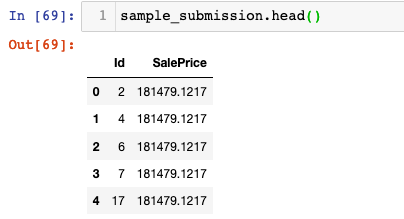